In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

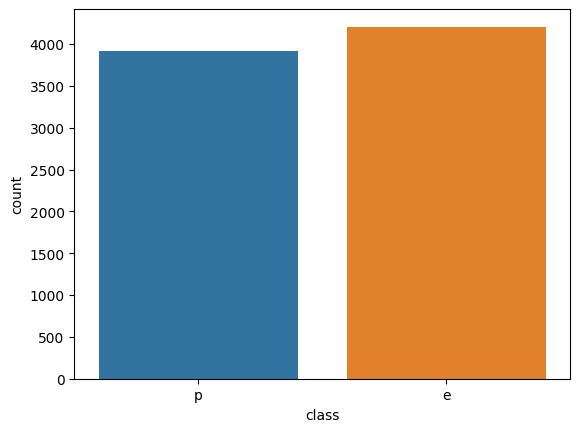

In [7]:
sns.countplot(x=df['class'])

In [ ]:
## the above figure shows us that the data contains more mushroom type which are edible than poisonous.

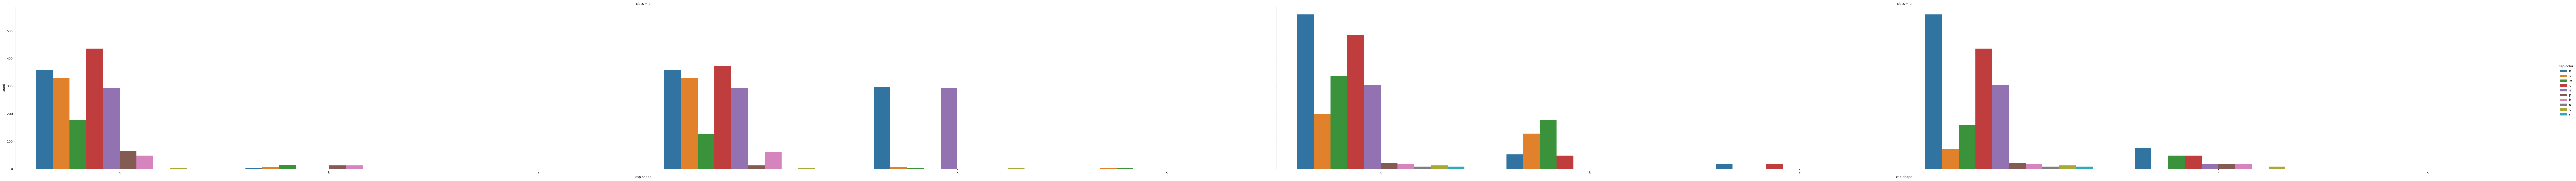

In [15]:

g = sns.catplot(x="cap-shape", hue="cap-color", col="class", data = df, kind="count", height =8, aspect =7)

In [11]:
## from the above plots we can essentially compare with type or species of mushroom is more edible or poisonous
## the issue lies here is that if a specific species is most edible is also most poisonous as well.
## so we need to look out for species that are very low in poisonous content but have some subtaintial count for being edible whearas in case of a mushroom being poisonous we need to look for species that are lest edible and substaintially poisonous.

## The "white coloured" mushroom and "bell shapped" mushrooms are the most edible or highly recommended for eating
## the "red coloured knobbed shaped" mushroom is highly poisonous.

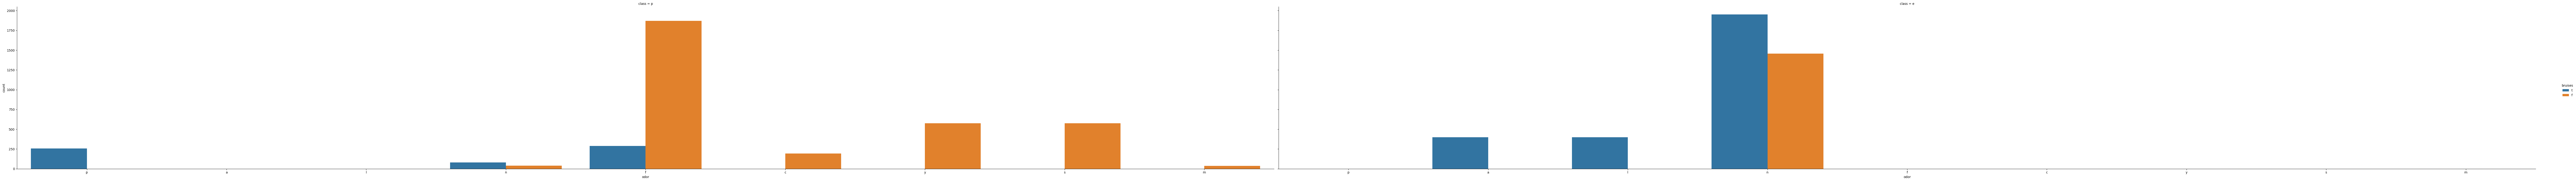

In [16]:

g = sns.catplot(x="odor", hue="bruises", col="class", data = df, kind="count", height =8, aspect =7)

In [13]:
## from the above plot we can infer that mushrooms that are bruised and also odorless are highly edible.
## the mushrooms with fishy odor and no bruises are considered to be highly poisonous.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
x = df.drop(['class'] , axis = 1)
y = df['class']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

In [21]:
## decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(x_train , y_train)

In [22]:
dt.score(x_train , y_train)


0.9778403095321843

In [25]:
predictions = dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9827727645611156

In [27]:
## random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [28]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9912064720365811

In [29]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9913863822805579

In [30]:
accuracy_score(y_test , predictions)

0.9913863822805579

In [ ]:
## Inference
## 1. Decision Tree Accuracy - 98.27%
## 2. Random Forest Accuracy - 99.13%

## Hence, Ramdom Forest is comparitively better